In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Overview
## In this package the player creates gameobjects by placing objects into a grid. I am collecting data averagnig the number of parts used to see if I need to increase or decrease the grid size in the package and how it might effect usability

# Aim
## My aim for the experiment is to see what the sweet spot is for number of squares in the grid for the player to haev an optimised and balanced building experience with the package without it being too overwhelming.
- There is only 1 condition but I will be seeing how many parts players used in the game Recycling Rats.
- I feel the sweet spot is 35 squares as it is big enough for expansion but small enough to be a useable UI and not overwhelming for the player on first play.

# Method
## The method I used to gather the data is just to take in how many parts each player used in the Recycling Rats game and how that effects win rate.

# Data
- number_of_player_parts : number of parts used by each player
- device_id : used to diferenciate between players and remove development devices
- player_wins : number of rounds won by player per game

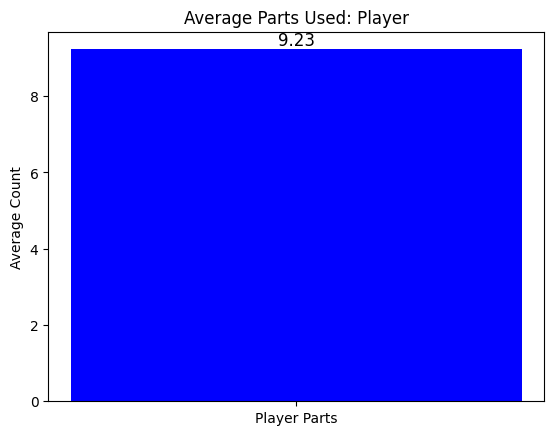

In [10]:
df = pd.read_csv('data.csv')
dev_device_ids = [
    '25b58845967681ab1b8c212f8688c365',
    '32a7e6878141def7c2fd776b6c2f193927aedc0a'
]
plot_df = df[~df['device_id'].isin(dev_device_ids)]
# Ensure the columns exist in the filtered dataset
if 'number_of_player_parts' in plot_df.columns:
    avg_player_parts = plot_df['number_of_player_parts'].mean()
    # Create a bar chart for comparison
    plt.bar(
        ["Player Parts"],
        [avg_player_parts],
        color=['blue']
    )

    # Add title and labels
    plt.ylabel("Average Count")
    plt.title("Average Parts Used: Player")

    # Show the numbers on top of the bars
    plt.text(0, avg_player_parts, f"{avg_player_parts:.2f}", ha='center', va='bottom', fontsize=12)
    
    plt.show()
else:
    print("Columns 'number_of_player_parts' or 'number_of_enemy_parts' not found in the dataset.")

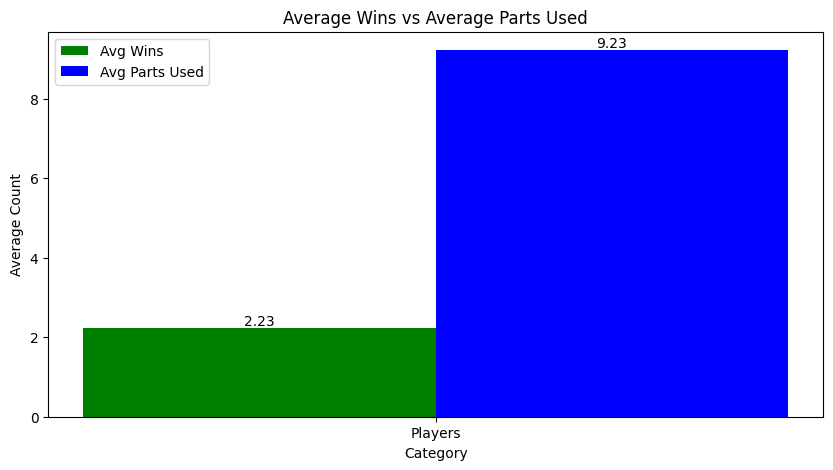

In [11]:
dev_device_ids = [
    '25b58845967681ab1b8c212f8688c365',
    '32a7e6878141def7c2fd776b6c2f193927aedc0a'
]

plot_df = df[~df['device_id'].isin(dev_device_ids)].reset_index(drop=True)

# Ensure the necessary columns exist in the dataset
if {'player_wins', 'enemy_wins', 'number_of_player_parts', 'number_of_enemy_parts', 'AB_test'}.issubset(plot_df.columns):
    # Calculate averages for Group A
    avg_player_wins = plot_df['player_wins'].mean()
    avg_player_parts = plot_df['number_of_player_parts'].mean()


    # Prepare data for grouped bar chart
    categories = ["Players"]
    avg_wins = [avg_player_wins,]
    avg_parts = [avg_player_parts,]

    x = range(len(categories))  # X positions

    # Create grouped bar chart
    plt.figure(figsize=(10, 5))
    plt.bar(x, avg_wins, width=0.4, label="Avg Wins", color='green', align='center')
    plt.bar([i + 0.4 for i in x], avg_parts, width=0.4, label="Avg Parts Used", color='blue', align='center')

    # Add labels and title
    plt.xlabel("Category")
    plt.ylabel("Average Count")
    plt.title("Average Wins vs Average Parts Used")
    plt.xticks([i + 0.2 for i in x], categories)  # Center the ticks

    # Show values on bars
    for i in range(len(categories)):
        plt.text(i, avg_wins[i], f"{avg_wins[i]:.2f}", ha='center', va='bottom', fontsize=10, color='black')
        plt.text(i + 0.4, avg_parts[i], f"{avg_parts[i]:.2f}", ha='center', va='bottom', fontsize=10, color='black')

    # Show legend
    plt.legend()

    # Show plot
    plt.show()

else:
    print("One or more required columns ('player_wins', 'enemy_wins', 'number_of_player_parts', 'number_of_enemy_parts', 'AB_test') not found in the dataset.")


# Results
## The player tends to use around 10 parts per game which is a good bit lower than the given 35 squares of the grid. 
## The player tends to win around 2 rounds per game with that many parts

# Interpretaion
## I take this as there is more sqaures than required which shows my original hypothesis to be slightly off. Stil I feel the number of squares is not to overwhelming for the player. I can also see with the 10 avg parts used the player stills seems to win the game which shows that they are using plenty of squares for the given use case.

# Conclusion
## In conclusion I feel a few changes could be made to the grid maybe give the player and extra couple of options on the hotbar compared to the size of the grid to increase variety of the pieces and buildings that can be made.